In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# LinearAlgebra

In this section we will use the following notation:

- Lower case, greek letters for numerical values (depends on the context). For example, $\alpha$, $\beta$, etc.
- Lower case, normal weight letters for values or variables. For example, $a$, $b$, $x$, etc.
- Lower case, bold weight letters for vectors. For example, ${\bf a}$, ${\bf b}$, ${\bf x}$, etc.
- Upper case, bold weight letters for matrices. For example, ${\bf A}$, ${\bf B}$, ${\bf X}$, etc.

## 1. Vector Algebra

Let ${\bf x}$ denote the $n$-dimensional vector.
To be more specific, let a *column* vector looks like that:
$$
{\bf x}_\text{column} =
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix}
$$

Also, we can define a *row* vector:
$$
{\bf x}_\text{row} =
\begin{pmatrix}
x_1 &
x_2 &
\dots &
x_n
\end{pmatrix}
$$

To convert from row vector to column vector and back, we can use a **transpose** operation, denoted as a superscript $T$:
$$
\begin{align}
{\bf x}_\text{row}^T &= {\bf x}_\text{column} \\
{\bf x}_\text{column}^T &= {\bf x}_\text{row} \\
\end{align}
$$

**Note:** As a general rule, when you see a vector denoted as ${\bf x}$ it usually implies a **column** vector, while ${\bf x}^T$ would represent a **row** vector.
However, sometimes I use them interchangeably (my bad), and whether it's row or column will often depend on the context.

A vector with all elements equal to 1 is usually written as ${\bf 1}$, and if all its elements equal to 0, it is denoted as ${\bf 0}$:
$$
\begin{align}
{\bf 0}^T &= \begin{pmatrix} 0 & 0 & 0 & 0 & \dots & 0 \end{pmatrix} \\
{\bf 1}^T &= \begin{pmatrix} 1 & 1 & 1 & 1 & \dots & 1 \end{pmatrix}
\end{align}
$$

In `numpy` you can create a row vector using

In [2]:
x = np.array([
    [0, 1, 2, 3]
])
print(f'The column vector x is:\n{x}')

The column vector x is:
[[0 1 2 3]]


Notice that we use `[[]]` to make the array 2-dimensional. That allows use to use **transpose**. In `numpy` transpose is simply `.T`. To create a column vector:

In [3]:
x_transpose = x.T
print(f'The column vector (x transpose)is:\n{x_transpose}')

The column vector (x transpose)is:
[[0]
 [1]
 [2]
 [3]]


**What do _vectors_ mean?**

Vector is a line that has a direction and starts at the origin<sup>$\dagger$</sup>.
Every number in the vector represents the length of the dagger in this particular direction.
For example, vectors ${\bf v_1} = (1.1, -2.9)$ represents a vector in 2-dimensional space with x being 1.1 and y being -2.9, while ${\bf v_2} = (0.1, 1.7)$  and ${\bf v_3} = (-2, 1)$ represent vectors pointing to (0.1, 1.7) and (-2, 1) respectively
(see visualization below).

<sup>$\dagger$The location of the origin in the context of vectors is arbitrary.</sup>

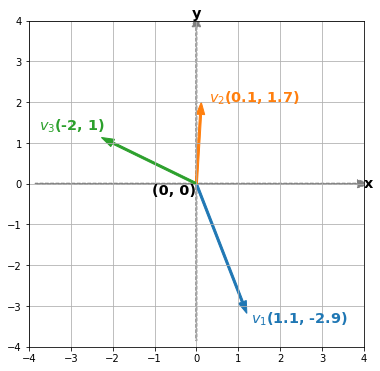

In [146]:
from utils import make_grid
from utils import add_line, add_vector

v1 = np.array([[1.1, -2.9]])
v2 = np.array([[0.1, 1.7]])
v3 = np.array([[-2, 1]])

fig = make_grid(xlim=[-4, 4], ylim=[-4, 4], figsize=(6, 6))

v1_plot = add_vector(v1, name='$v_1$')
v2_plot = add_vector(v2, name='$v_2$')
v3_plot = add_vector(v3, name='$v_3$')

# add_line((0, 0), v1[0], color=v1_plot)
# add_line((0, 0), v2[0], color=v2_plot)
# add_line((0, 0), v3[0], color=v3_plot)

### 1.1 Scalar Product (aka Dot Product)

The _scalar product_ ${\bf w}\cdot{\bf x}$ is defined as
$$\begin{align}
{\bf w}\cdot{\bf x} &= w_1x_1 + w_2x_2 + \dots + w_nx_n\\
&= \sum_{i=1}^{n}{w_ix_i}\\
&= {\bf w}^T{\bf x}
\end{align}$$

The $\cdot$ (center dot) represents the scalar product.

In `numpy` you can use `np.dot` function to compute the scalar product, like so:

In [5]:
w = np.array([[1, 2, 3, 4]]).T  # Column vector w
x = np.array([[0.1, 0.01, 0.001, 0.0001]]).T  # Column vector x

y = np.dot(w.T, x)
print(f'w⋅x = {y}')

w⋅x = [[0.1234]]


In the example above the product is computed as $1\cdot0.1 + 2\cdot0.01 + 3\cdot0.001 + 4\cdot0.0001$, which sums up to $0.1234$.
The result is `[[0.1234]]` because the `numpy` is trying to preserve the "[rank](https://en.wikipedia.org/wiki/Rank_(linear_algebra))" of the result.

The **length of vector** is denoted by $|{\bf x}|$, and defined as follows:
$$
|{\bf x}| = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}
$$

Notice that if we expand the squares, we get
$$
\begin{align}
|{\bf x}| &= \sqrt{x_1x_1 + x_2x_2 + \dots + x_nx_n} \\
&= \sqrt{{\bf x}^T{\bf x}}
\end{align}
$$


Sometimes it is useful to define the **square length** of a vector, because it represents the square of the vector length and is easy to compute as a scalar product of the vector with itself:
$$
|{\bf x}|^2 = {\bf x}^T{\bf x} = {\bf x}^2 = x_1^2 + x_2^2 + \dots + x_n^2
$$

If the length of a vector has a value of 1, it is called a *unit vector*.



Geometrically, you can look at the scalar product as the length of one vector when projected onto another multiplied by the length of the other vector.
For example, if you have vectors $\mathbf{a} = (2, 1)$ and $\mathbf{b} = (1, 3)$, and you'd like to compute the cross product, you can get the projection of vector $\mathbf{a}$ on $\mathbf{b}$, and multiply it by the magnitude of vector $\mathbf{b}$.

$$\begin{align}
\mathbf{a}\cdot\mathbf{b} &= |\mathbf{a}||\mathbf{b}|\cos(\theta_{a,b})
\end{align}$$

But now the question is how do we compute the angle between the two vectors in order to get the cosine of it.
Of course we can use the arctangent to solve it<sup>$\dagger$</sup>:
$$\begin{align}
\theta_{a, b} &= \arctan\left(
\pm\frac{m_a - m_b}{1 + m_am_b}
\right) \\
&= \arctan\left(
\pm\frac{1/2 - 3/1}{1 + 1/2\cdot3/1}
\right) \\
&= \pm \frac{\pi}{4} \\
\cos{\theta_{a, b}} & \approx 0.707 \\
\end{align}$$

To compute the cross product:
$$\begin{align}
|\mathbf{a}| &= \sqrt{5}  \\
|\mathbf{b}| &= \sqrt{10} \\
\cos{\theta_{a, b}} & \approx 0.707 \\
\Rightarrow \\
\mathbf{a}\cdot\mathbf{b} &= 0.707\sqrt{5}\sqrt{10} \\
&= 5
\end{align}$$

It is much easier to compute the scalar product as
$$\begin{align}
\mathbf{a}\cdot\mathbf{b} &= 2\cdot1 + 1\cdot3\\
&= 5
\end{align}$$

<br>
<small>$\dagger$ $m_a$ and $m_b$ represent the slopes of the vectors $\mathbf{a}$ and $\mathbf{b}$.</small>

#### **Assignment 1.1.1**

Implement the scalar product without using the `np.dot`.
The implementation can use the `for` loops.

Hints:
1. Check if the inputs are of the same size (use `np.size` or `np.shape`)
2. Don't forget to check if the first vector is a row vector, while the second vector is a column vector.

In [6]:
def scalar_product(vector_a, vector_b):
    # TODO: Implement the scalar product here
    # ...
    # Hint: Maybe you can loop over every element of both vectors?
    return 0

In [7]:
# Function for testing the correctness
def test_scalar_product(func):
    from numbers import Number
    max_len = np.random.randint(10) + 1
    a = np.random.randn(max_len, 1)
    b = np.random.randn(max_len, 1)
    
    y = np.dot(a.T, b)
    y_hat = func(a.T, b)
    
    while not isinstance(y_hat, Number):
        y_hat = y_hat[0]
    while not isinstance(y, Number):
        y = y[0]
    print('Implementation is', 'correct' if np.allclose(y, y_hat) else 'incorrect')

test_scalar_product(scalar_product)
test_scalar_product(scalar_product)
test_scalar_product(scalar_product)

Implementation is incorrect
Implementation is incorrect
Implementation is incorrect
